# 2021/11/11 Investigating DEER Experiments
## Sample: MQ460 Protonated 100uM

In [20]:
import sys
sys.path.append('/mnt/d/autoDeer/autoDeer/autoDeer') # This is needed to be able to import the latest version of my code
import TwoD_Experiment
import deerlab as dl
import numpy as np
import matplotlib.pyplot as plt

### Intial 2D Experiment

4Pulse times: (3.3, 5.1)


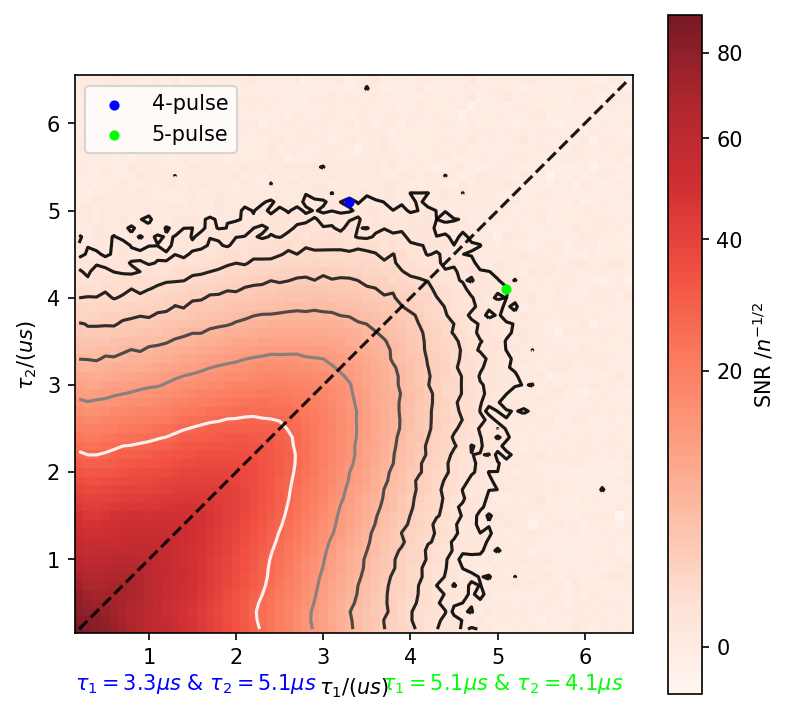

In [2]:
exp = TwoD_Experiment.TwoD_Experiment()
exp.set_snr_target(20)
exp.load('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Protonated_2D_dec_64x64_200+100.DSC')
fig = exp.create_twoD_plot(norm='SNRpShot',contour='SNRpShot',optimal=True)
fig.show()
print('4Pulse times:',exp.time_4p)

### Initial DEER experiments

#### 90mins  $\tau_1 = 3.3\mu s$ and $\tau_2 = 5.1\mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 0.971422  RMSD  = 4.446569e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  5.703e+03  Signal scale (arb.u.)
  bgparam[0]:   37.4283008  (6.8779948, 67.9786069)  Concentration of pumped spins (μM)
  exparam[0]:   0.3176639  (0.2728869, 0.3624410)  Modulation depth ()
----------------------------------------------------------------------------


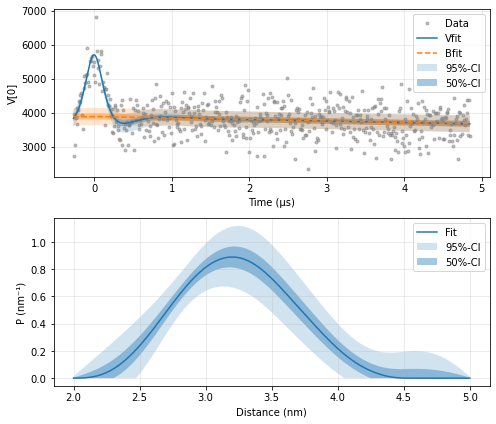

In [3]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Protonated_DEER_2hrs_d3_3020_90min/20211110_MQ460_50K_Protonated_DEER_2hrs_d3_3020_90min.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a= fit.plot()

#### 14hrs Overnight $\tau_1 = 3.3\mu s$ and $\tau_2 = 5.1\mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 0.858061  RMSD  = 1.314971e+03
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  4.480e+04  Signal scale (arb.u.)
  bgparam[0]:   63.3101544  (50.2151949, 76.4051138)  Concentration of pumped spins (μM)
  exparam[0]:   0.3074429  (0.2938961, 0.3209897)  Modulation depth ()
----------------------------------------------------------------------------


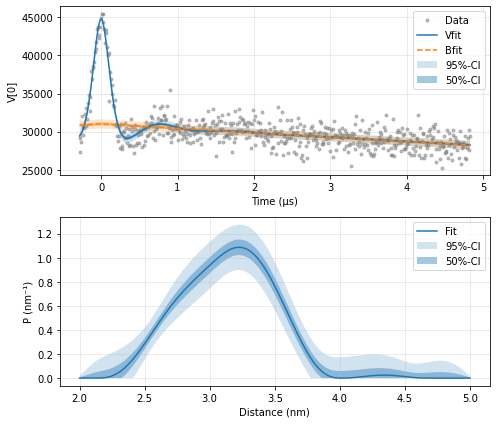

In [4]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Protonated_DEER_14hrs_d3_3020/20211110_MQ460_50K_Protonated_DEER_14hrs_d3_3020.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()

### Subsequent 2D Experiments

Since our original 2D Decoherence experiment was done before the system was DEER optimised I decided to repeat these experiments to see what effect this has on the wider picture.  I also saved this experiment at 3 points. After 1 scan, 2 scans and 4 scans, so 30mins, 1hr and 2hrs. 

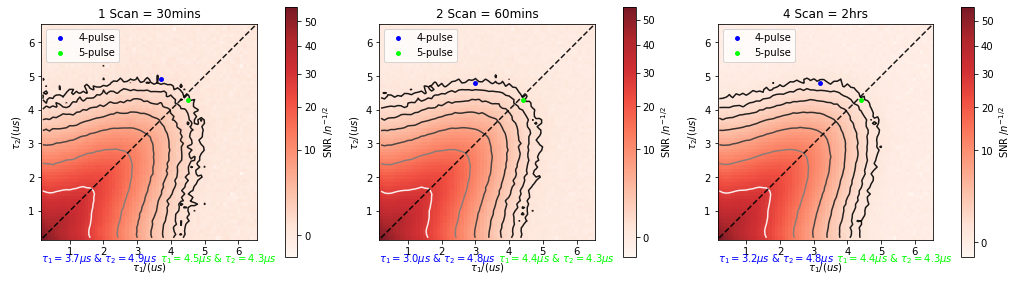

In [5]:
plt.ioff()
fig = plt.figure(constrained_layout=True, figsize=(14, 4))
subfigs = fig.subfigures(1, 3, wspace=0.02)

exp1 = TwoD_Experiment.TwoD_Experiment()
exp1.set_snr_target(20)
exp1.load('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Pro_2D_dec_64x64_200+100_afterDEER_30min.DSC')
subfigs[0] = exp1.create_twoD_plot(norm='SNRpShot',contour='SNRpShot',optimal=True,figure=subfigs[0],title='1 Scan = 30mins')
exp = TwoD_Experiment.TwoD_Experiment()
exp.set_snr_target(20)
exp.load('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Pro_2D_dec_64x64_200+100_afterDEER_60min.DSC')
subfigs[1] = exp.create_twoD_plot(norm='SNRpShot',contour='SNRpShot',optimal=True,figure=subfigs[1],title='2 Scan = 60mins')
exp = TwoD_Experiment.TwoD_Experiment()
exp.set_snr_target(20)
exp.load('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Pro_2D_dec_64x64_200+100_afterDEER_2hr.DSC')
subfigs[2] = exp.create_twoD_plot(norm='SNRpShot',contour='SNRpShot',optimal=True,figure=subfigs[2],title='4 Scan = 2hrs')

plt.show()


#### 2hrs  $\tau_1 = 2.6\mu s$ and $\tau_2 = 4.7\mu s$ SNR Target = 30

Here is a DEER experiment taken from this, using the best calculations from the 2hrscan

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.116522  RMSD  = 4.366181e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  1.675e+04  Signal scale (arb.u.)
  bgparam[0]:   25.7558997  (0.0100000, 197.6543624)  Concentration of pumped spins (μM)
  exparam[0]:   0.3180228  (0.2813901, 0.3546556)  Modulation depth ()
----------------------------------------------------------------------------


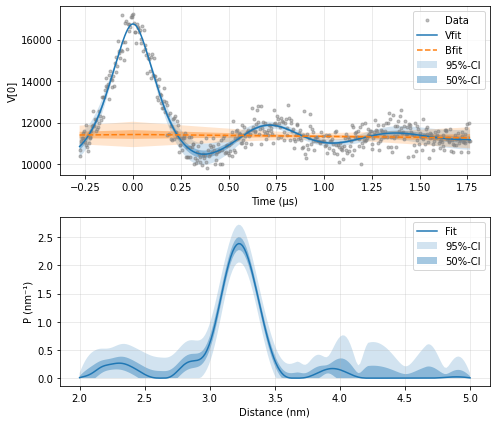

40.468907584484015


In [14]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211111_MQ460_50K_Protonated_DEER_2hrs_d1_2600_d3_2320/20211111_MQ460_50K_Protonated_DEER_2hrs_d1_2600_d3_2320.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(fit.V.max()/sigma)

#### 2hrs  $\tau_1 = 0.4\mu s$ and $\tau_2 = 4.7\mu s$ 

This is taking the same $\tau_2$ as above but using a shorter $\tau_1$. The aim of this is to investigate how much of an effect our longer than normal $tau_1$ has.

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.051434  RMSD  = 4.565464e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  4.654e+03  Signal scale (arb.u.)
  bgparam[0]:   30.1445069  (0.0100000, 193.9022882)  Concentration of pumped spins (μM)
  exparam[0]:   0.3034322  (0.2561105, 0.3507538)  Modulation depth ()
----------------------------------------------------------------------------


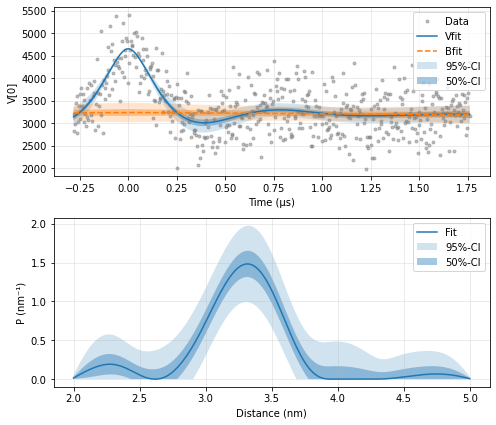

SNR=10.432 & MNR = 3.165


In [17]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460_50K_Protonated_DEER_2hrs_d1_400_d2_4700/20211110_MQ460_50K_Protonated_DEER_2hrs_d1_400_d2_4700.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

##### Comparison
Comparing the high $\tau_1$ case with the lower, standard technique shows a significant SNR reduction.

Calculated by DeerAnalysis:
|Experiment| Modulation Depth| SNR | SNR(w.r.t modulation)|
|----------|-----------------|-----|------------------|
|$\tau_1 = 2.6us$ |0.318|38.87 |13.1|
|$\tau_1 = 0.4us$ |0.485|9.69|4.7|

Calculated by DeerLab:
|Experiment| Modulation Depth| SNR | SNR(w.r.t modulation)|
|----------|-----------------|-----|------------------|
|$\tau_1 = 2.6us$ |0.337|40.47 |12.36|
|$\tau_1 = 0.4us$ |0.303|10.43|3.16|

### Investigating the effect of a symmetrical trace

SNR Target of 20. Using $\tau_1 = 3.7$ and $\tau_2 = 4.9$

#### Standard Method

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.073890  RMSD  = 4.738620e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  9.355e+03  Signal scale (arb.u.)
  bgparam[0]:   37.0478399  (0.0100000, 179.8201432)  Concentration of pumped spins (μM)
  exparam[0]:   0.3152887  (0.2819727, 0.3486048)  Modulation depth ()
----------------------------------------------------------------------------


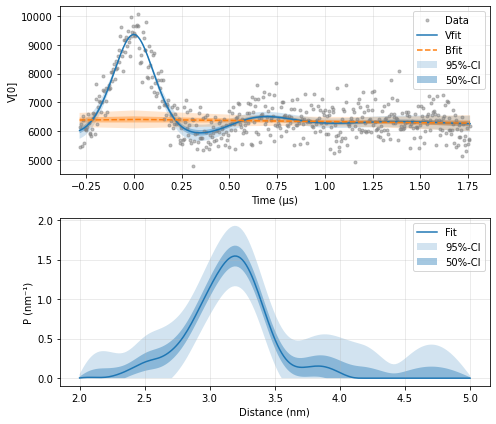

SNR = 20.419 & MNR = 6.438


In [18]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_3420/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_3420.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

#### Symmetric Method

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 0.931849  RMSD  = 4.572172e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  9.300e+03  Signal scale (arb.u.)
  bgparam[0]:   48.0364785  (0.0100000, 1384.9890162)  Concentration of pumped spins (μM)
  exparam[0]:   0.3125832  (0.1156143, 0.5095521)  Modulation depth ()
----------------------------------------------------------------------------


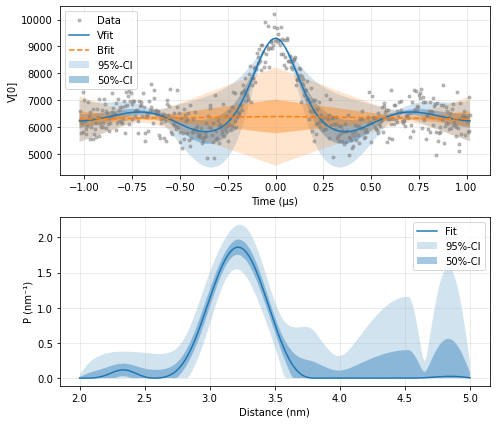

SNR = 19.595 & MNR = 6.125


In [19]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_2676_sym/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_2676_sym.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

#### Comparison

The symmetric case finds it harder to fit background and uncertainty in the longer regions. Realistically we still need a longer trace even if we sample the first oscillation twice

### Comparison of differernt $\tau_1$ with a SNR taget of 20

Here I measured 3 times for 2 hours each time. Once with the 'ideal' settings given by the 2D Decoherence experiment, once with current standard practice (i.e. a very short $\tau_1$) and finally with the Carr-Purcell Condition (i.e. $\tau_1 = \tau_2$)

#### Ideal Settings $\tau_1 = 3.7\mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.073890  RMSD  = 4.738620e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  9.355e+03  Signal scale (arb.u.)
  bgparam[0]:   37.0478399  (0.0100000, 179.8201432)  Concentration of pumped spins (μM)
  exparam[0]:   0.3152887  (0.2819727, 0.3486048)  Modulation depth ()
----------------------------------------------------------------------------


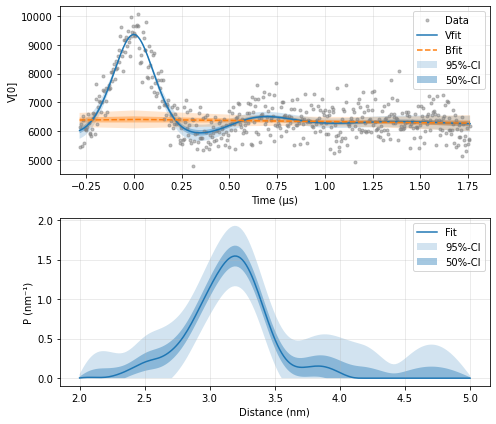

SNR = 20.419 & MNR = 6.438


In [21]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_3420/20211110_MQ460p_50K_DEER_2hrs_d1_3700_d2_4900_d3_3420.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

#### Carr-Purcell Settings $\tau_1 = 4.9 \mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.453485  RMSD  = 4.940180e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  1.531e+03  Signal scale (arb.u.)
  bgparam[0]:   0.0103549  (0.0100000, 0.0136341)  Concentration of pumped spins (μM)
  exparam[0]:   0.0000448  (0.0000000, 0.1051679)  Modulation depth ()
----------------------------------------------------------------------------


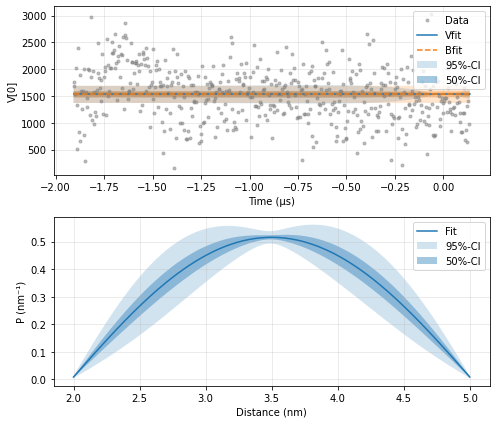

SNR = 3.729 & MNR = 0.0


In [23]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460p_50K_DEER_2hrs_d1_4900_d2_4900_std/20211110_MQ460p_50K_DEER_2hrs_d1_4900_d2_4900_std.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

#### Standard Settings $\tau_1 = 0.4\mu s$

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 1.153550  RMSD  = 4.709771e+02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  2.714e+03  Signal scale (arb.u.)
  bgparam[0]:   2.4398646  (0.0100000, 221.5734988)  Concentration of pumped spins (μM)
  exparam[0]:   0.3435135  (0.2802057, 0.4068213)  Modulation depth ()
----------------------------------------------------------------------------


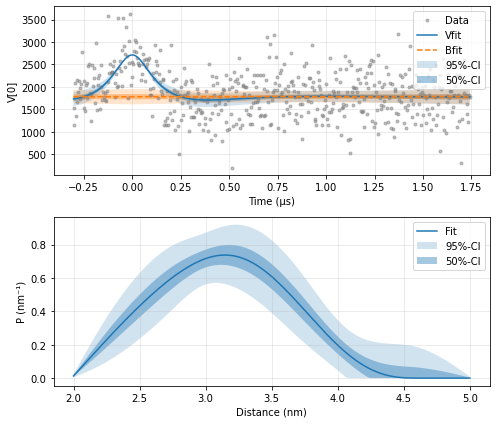

SNR = 6.176 & MNR = 2.122


In [22]:
t, Vexp = dl.deerload('/mnt/v/Data/2D Decoherence/MQ460/MQ460_H2O_gly/2021_11_10_DEER_TEST/20211110_MQ460p_50K_DEER_2hrs_d1_400_d2_4900_std/20211110_MQ460p_50K_DEER_2hrs_d1_400_d2_4900_std.DSC')
Vexp = dl.correctphase(Vexp)
t = dl.correctzerotime(Vexp,t)
r = np.linspace(2,5,200)           # distance axis, nm
fit = dl.fitmodel(Vexp,t,r,'P',dl.bg_hom3d,dl.ex_4pdeer,verbose=True)
a = fit.plot()
sigma = dl.noiselevel(Vexp,'der')
print(f'SNR = {round(fit.V.max()/sigma,3)} & MNR = {round(fit.V.max()/sigma*fit.exparam[0],3)}')

#### Comparison

Calculated by DeerAnalysis:
|Experiment| Modulation Depth| SNR | SNR(w.r.t modulation)|
|----------|-----------------|-----|------------------|
|$\tau_1 = 3.7us$ |0.361|19.67|7.1|
|$\tau_1 = 4.9us$ |-|-|- |
|$\tau_1 = 0.4us$ |0.70????|4|2.8|

Calculated by DeerLab:
|Experiment| Modulation Depth| SNR | SNR(w.r.t modulation) |
|----------|-----------------|-----|------------------|
|$\tau_1 = 3.7us$ |0.315|20.419|6.438|
|$\tau_1 = 4.9us$ |0 |3.7|0| 
|$\tau_1 = 0.4us$ |0.344|6.176|2.122|

Compare to slices